# Норма матрица


Садржај:
1. [Траг матрице](#Траг-матрице)
1. [Фробенијусова норма](#Фробенијусова-норма)
1. [Норма трага (Nuclear norm)](#Норма-трага-(Nuclear-norm))
1. [Норма индукована векторском нормом](#Норма-индукована-векторском-нормом)
1. [Кондициони број матрице](#Кондициони-број-матрице)

In [1]:
import numpy as np
import numpy.random as rndm
import scipy.linalg as spl

## Траг матрице

**Дефиниција 1.** Траг квадартне аматрице $A=[a_{ij}]\in\mathcal{M}_{n\times n}$ је збир њених дијагоналних елемената, тј. ${\rm tr}(A)=\displaystyle\sum_{i=1}^na_{ii}.$

Кроз пример матрице мале димензије упознаћемо особине функције трага, ${\rm tr}:\mathcal{M}_{n\times n}\mapsto\mathbb{R}.$ 

In [2]:
A=np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
np.trace(A)

12

Имајући у виду да се дијагонални елементи квадратне матрице не померају приликом транспоновања, закључујемо да је 
$${\rm tr}(A)={\rm tr}(A^T).$$

In [4]:
np.trace(A.T)

12

Траг матрице показује и особину линеарности,
$${\rm tr}(\alpha A+\beta B)=\alpha\, {\rm tr}(A)+\beta\, {\rm tr}(B).$$

In [5]:
B=rndm.rand(3,3)
np.trace(B)

1.4063796009240843

In [6]:
np.trace(3*A-2*B)==3*np.trace(A)-2*np.trace(B)

True

Најважније особине трага матрице дате су наредним тврђењима.

**Теорема 1.**     За квадратну матрицу $A=[a_{ij}]$ реда $n$ са сопственим вредностима $\lambda_1,\lambda_2,\dots,\lambda_n,$ важи
$${\rm tr}(A)=\lambda_1+\lambda_2+\dots+\lambda_n.$$

**Пример 1.** Упоредићемо вредности трага и збира сопствених вредности матрице $A=\begin{bmatrix}a&b\\c&d\end{bmatrix}.$
Сопствене вредности $\lambda_1,\lambda_2$ матрице $A$ су нуле њеног карактеристичног полинома. 

\begin{align}
P_A(\lambda)&=\det(A-\lambda I)=\begin{vmatrix}a-\lambda&b\\c&d-\lambda\end{vmatrix}
=(a-\lambda)(d-\lambda)-bc=\lambda^2-\underbrace{(a+d)}_{{\rm tr}(A)}\lambda+\underbrace{ad-bc}_{\det(A)},\\
P_A(\lambda)&=(\lambda-\lambda_1)(\lambda-\lambda_2)=\lambda^2-(\lambda_1+\lambda_2)\lambda+\lambda_1\,\lambda_2
\end{align}

На основу Вијетових формула закључујемо да је ${\rm tr}(A)=\lambda_1+\lambda_2$ и $\det(A)=\lambda_1\lambda_2.$ Кроз израчунавања можемо да проверимо сличне једнакости за матрице већих димензија.

In [7]:
A=rndm.rand(7,7)
spektar=np.linalg.eigvals(A)

In [8]:
np.round(np.linalg.det(A)-np.prod(spektar),3)

0j

In [9]:
np.round(np.trace(A)-np.sum(spektar),3)

0j

Нека су $A,B\in\mathcal{M}_{m\times n}$ правоугаоне матрице истих димензија са елементима $A=[a_{ij}],\ B=[b_{ij}].$ Потражићемо израз трагова производа ${\rm tr}(A^TB)$ и ${\rm tr}(B^TA).$

Дијагонални елементи производа су:
\begin{align}
(A^TB)_{jj}&=\begin{bmatrix}a_{1j}&a_{2j}&\dots&a_{mj}\end{bmatrix}\begin{bmatrix}b_{1j}\\b_{2j}\\\vdots\\b_{mj}\end{bmatrix}
=\displaystyle\sum_{i=1}^ma_{ij}b_{ij},\\
{\rm tr}(A^TB)&=\displaystyle\sum_{j=1}^n(A^TB)_{jj}=\displaystyle\sum_{j=1}^n\sum_{i=1}^ma_{ij}b_{ij}
=\displaystyle\sum_{i=1}^m\sum_{j=1}^n a_{ij}b_{ij},\\
(B^TA)_{jj}&=\begin{bmatrix}b_{1j}&b_{2j}&\dots&b_{mj}\end{bmatrix}\begin{bmatrix}a_{1j}\\a_{2j}\\\vdots\\a_{mj}\end{bmatrix}
=\displaystyle\sum_{i=1}^mb_{ij}a_{ij},\\
{\rm tr}(B^TA)&=\displaystyle\sum_{i=1}^m\sum_{j=1}^n a_{ij}b_{ij}.
\end{align}

## Фробенијусова норма

Скаларни производ на скупу правоугаоних матрица веома се природно уводи векторизацијом ових дводимезионалних објеката. За две матрице $A,B\in\mathcal{M}_{m\times n},$ са елементима $A=[a_{ij}],\ B=[b_{ij}]$ скаларни производ је 
$$A\cdot B=\sum_{i=1}^m\sum_{j=1}^na_{ij}b_{ij}.$$

Норма матрица индукована овим скаларним производом назива се Фробенијусова норма.
$$\|A\|_{F}=\sqrt{A\cdot A}=\sqrt{\sum_{i=1}^m\sum_{j=1}^na_{ij}^2}.$$

Јасно је да се због начина увођења скаларни производ матрица на скупу вектора, тј. на скупу $\mathcal{M}_{n\times1}$ поклапа са стандардним скаларним производом. Такође, Фробенијусова норма се на скупу вектора поклапа са Еуклидовом нормом.

Још један начин тумачења овог израза јесте кроз векторе-врста и векторе-колона матрице $A.$ Уколико означимо елементе ових скупова вектора матрице $A$ 
$$A=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	u_1&u_2&\dots&u_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]=
\left[\begin{array}{c}
\phantom{WW}v_1^T\phantom{WW}\\\hline
\phantom{WW}v_2^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_m^T\phantom{WW}
\end{array}\right],$$ 
Фробенијусова норма је тада Еуклидова норма вектора Еуклидових норми вектора-врста или вектора-колона,
$$\|A\|_F=\sqrt{\|u_1\|^2+\|u_2\|^2+\dots+\|u_n\|^2}=\sqrt{\|v_1\|^2+\|v_2\|^2+\dots+\|v_m\|^2}.$$

Одатле тривијално следи да је $\|A\|_F=\|A^T\|_F.$

**Последица 1.** Фробенијусова норма ортогоналне матрице димензије $n$ једнака је $\sqrt{n}.$

**Пример 2.** Проверићемо норму ортогоналне матрице димензије $7.$

In [10]:
Q,_=np.linalg.qr(A)

In [11]:
np.linalg.norm(Q,'fro')

2.6457513110645907

In [12]:
np.sqrt(7)

2.6457513110645907

Приметимо да се израз за скаларни производ матрица $\mathcal{M}_{m\times n}$ може да опише и функцијом трага,
$$A\cdot B={\rm tr}(A^TB)={\rm tr}(B^TA).$$ 
На тај начин долазимо до још једног израза за Фробенијусову норму матрица
$$\|A\|_F^2={\rm tr}(A^TA)=\sigma_1^2+\sigma_2^2+\dots+\sigma_r^2,$$
$$\|A\|_F=\sqrt{{\rm tr}(A^TA)}=\sqrt{\sigma_1^2+\sigma_2^2+\dots+\sigma_r^2},$$
где су $\sigma_k,\ k=1,2,\dots,r,$ сингуларне вредности матрице $А$ и $r$ је ранг матрице. Фробенијусова норма представља и Еуклидову норму вектора сингуларних вредности матрице.

In [13]:
B=rndm.rand(7,23)
np.linalg.norm(B,'fro')

7.485671821686488

In [14]:
sigma=spl.svdvals(B)
np.sqrt(np.sum(sigma**2))

7.485671821686489

**Пример 3.** Нека су $u\in\mathbb{R}^m$ и $v\in\mathbb{R}^n$ произвољни ненула вектори, и $u^{\ast}=\dfrac{u}{\|u\|},\ v^{\ast}=\dfrac{v}{\|v\|}$ одговарајући нормирани вектори у односу на $L_2$ норму. Потражимо Фробенијусову норму матрице ранга $1,$ $M=uv^T.$
$$M=uv^T=\big(\|u\|\,u^{\ast}\big)\big(\|v\|\,v^{\ast T}\big)=\|u\|\|v\|\,\big(u^{\ast}v^{\ast T}\big)
=u^{\ast}\,\big(\|u\|\|v\|\big)\,v^{\ast T}.$$
Последња једнакост представља SVD матрице $M.$ Једина сингуларна вредност матрице $M$ је производ норми вектора $\sigma_1=\|u\|\|v\|.$

Због тога је и Фробенијусова норма једнака том производу, $\|M\|_F=\sqrt{\sigma_1^2}=\sigma_1=\|u\|\|v\|.$

In [15]:
u=rndm.normal(2,2,23)
v=rndm.uniform(-1,1,57)
M=np.outer(u,v)
sing_vr=spl.svdvals(M)
np.round(sing_vr,3)

array([49.225,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [16]:
np.linalg.norm(u)*np.linalg.norm(v)

49.22537485635339

Осим своје везе са декомпозицијом матрица на сингуларне вредности и векторе, Фробенијусова норма показује повезаност са операцијом множења матрица кроз Еуклидову норму вектора. 

**Лема 1.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица и $v\in\mathbb{R}^n,$ и $\|\cdot\|$ ознака за Еуклидову норму вектора. Тада важи
$$\|Av\|\leq\|A\|_F\|v\|.\tag{1}$$

Особину $(1)$ зовемо слагање Фробенијусове норме са Еуклидовом нормом. 

**Доказ :**

Означимо компоненте матрице $A=[a_{ij}]$ и вектора $v=[x_i]_{n\times 1}.$ Тада је $i-$та компонента вектора $Av$ дата са $(Av)_i=\displaystyle\sum_{j=1}^na_{ij}x_j.$ Због тога целокупан вектор $Av$ гласи
$$Av=\begin{bmatrix} \displaystyle\sum_{j=1}^na_{1j}x_j\\
	\displaystyle\sum_{j=1}^na_{2j}x_j\\ \vdots\\
	\displaystyle\sum_{j=1}^na_{nj}x_j\end{bmatrix}.$$

Следи да је $\|Av\|^2=\displaystyle\sum_{i=1}^n \left(\sum_{j=1}^na_{ij}x_j\right)^2.$ 
Имајући у виду Шварцову неједнакост $$|\langle v,u\rangle|\leq\|v\|\ \|u\|\quad\Longleftrightarrow\quad 
|\langle v,u\rangle|^2\leq\|v\|^2\ \|u\|^2,$$ 
за све $i=1,2,\dots,m,$ имамо
$$\left(\sum_{j=1}^na_{ij}x_j\right)^2
	\leq\left(\sum_{j=1}^na_{ij}^2\right)
	\left(\sum_{j=1}^nx_{j}^2\right)=
	\left(\sum_{j=1}^na_{ij}^2\right)\|v\|^2.$$
Сумирањем по $i=1,2,\dots,m,$ лако долазимо до неједнакости
$$\|Av\|^2\leq\left(\displaystyle\sum_{i=1}^n\sum_{j=1}^na_{ij}^2\right)\|v\|^2=
	\|A\|_{F}^2\|v\|^2.\quad\Box$$  

**Последица 2.** Када се норма матрице слаже са нормом вектора за матричну нрму важи
$$\forall A\in\mathcal{M}_{n\times n}\quad \|A\|\geq\rho(A),$$
где је $\rho(A)$ спектрални полупречник матрице.

**Доказ :**

Претпоставимо да за неку матричну норму важи једнакост $(1).$ Нека је $\lambda$ доминантна сопствена вредност и $v$ одговарајући сопствени вектор. Тада је
$$\|Av\|=|\lambda|\,\|v\|=\rho(A)\,\|v\|\leq\|A\|\,\|v|.\quad\Box$$

На основу неједнакости $(1)$ добијамо наредно уопштење овог тврђења.  Такву особину зовемо суб-мултипликативност матричне норме.

**Теорема 2.** За матрице $A\in\mathcal{M}_{m\times n}$ и $B\in\mathcal{n\times p}$ важи
$$\|AB\|_{F}\leq\|A\|_{F}\|B\|_{F}.\tag{2}$$

**Доказ :**

Представимо производ две матрице кроз производе матрице $A$ и колоне матрице $B,$
$$AB=A\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	w_1&w_2&\dots&w_p\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]=
    \left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	Aw_1&Aw_2&\dots&Aw_p\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right].$$
Тада је 
\begin{align}
\|AB\|_F^2&=\|Aw_1\|^2+\|Aw_2\|^2+\dots+\|Aw_p\|^2\\
&\leq\|A\|_F^2\|w_1\|^2+\|A\|_F^2\|w_2\|^2+\dots+\|A\|_F^2\|w_p\|^2
=\|A\|_F^2\big(\|w_1\|^2+\|w_2\|^2+\dots+\|w_p\|^2\big)\\
&=\|A\|_F^2\|B\|_F^2.\quad\Box
\end{align}

**Пример 4.** Проверићемо суб-мултипликативност на примеру претходно дефинисаних матрица $A\in\mathcal{M}_{7\times7},\ B\in\mathcal{M}_{7\times23}.$

In [17]:
AF=np.linalg.norm(A,'fro')
BF=np.linalg.norm(B,'fro')
np.linalg.norm(A@B,'fro')<=AF*BF

True

**Последица 3.** Фробенијусова норма је инваријантна у односу на ортогоналне трансформације.

**Доказ :**

Нека је $Q\in\mathcal{M}_{n\times n}$ ортогонална матрица и $A\in\mathcal{m\times n}$ произвољна матрица са векторима колонама $u_1,u_2,\dots,u_n.$ Тада је
$$\|QA\|_F=\sqrt{\|Qu_1\|^2+\|Qu_2\|^2+\dots+\|Qu_n\|^2}=\sqrt{\|u_1\|^2+\|u_2\|^2+\dots+\|u_n\|^2}=\|A\|_F.$$

**Пример 5.** Проверићемо ову особину на примеру претходно дефинисаних матрица $Q,A\in\mathcal{M}_{7\times7},\ B\in\mathcal{M}_{7\times23}.$

In [18]:
np.linalg.norm(Q@A,'fro')-AF

0.0

In [19]:
np.linalg.norm(A@Q,'fro')-AF

4.440892098500626e-16

**Пример 6.** Проблем ортогоналне [Прокрустове постеље](https://sr.m.wikipedia.org/sr-ec/%D0%9F%D1%80%D0%BE%D0%BA%D1%80%D1%83%D1%81%D1%82)

Претпоставимо да имамо две колекције од $m$ тачака простора $\mathbb{R}^n,$ којима је описана нека конфигурација тачака у $\mathbb{R}^n.$ Једну од тих колекција сматрамо референтном, тј. сваку другу конфигурацију тачака упоређујемо са референтном. Скуп тачака који поредимо са референтним скупом зовемо тест конфигурација.

За дату тест и референтну конфигурациу желимо да утврдимо њихову блискост у распореду тачака. Две конфигурације су једнаке уколико су једнака растојања између одговарајућих парова тачака, као и углови које тачке формирају. Дакле, конфигурације су једнаке уколико постоји изометрија између два скупа. У терминима линеарне алгебре, полазни проблем сличности конфигурација гласи: правимо ортогоналне трансформације тест података док не пронађемо ону која производи конфигурацију најближу референтној. 

Да бисмо постављени проблем исказали матричном алгебром, тест конфигурацију представимо матрицом $A\in\mathcal{M}_{m\times n}$ и референтну конфигурацију представимо матрицом $B\in\mathcal{M}_{m\times n}.$ Врсте матрица $A$ и $B$ садрже координате тачака двеју конфигурација. 
$$A=\left[\begin{array}{c}
\phantom{WW}a_1^T\phantom{WW}\\\hline
\phantom{WW}a_2^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}a_m^T\phantom{WW}
\end{array}\right],\qquad 
B=\left[\begin{array}{c}
\phantom{WW}b_1^T\phantom{WW}\\\hline
\phantom{WW}b_2^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}b_m^T\phantom{WW}
\end{array}\right].$$

Постављени проблем сада изражавамо као потрагу за ортогоналном матрицом $Q\in\mathcal{M}_{m\times m}$ којом се минимизира растојање између матрица $AQ$ и $B,$ 
$$AQ=\left[\begin{array}{c}
\phantom{WW}a_1^TQ\phantom{WW}\\\hline
\phantom{WW}a_2^TQ\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}a_m^TQ\phantom{WW}
\end{array}\right].$$

За растојање између две конфигурације користимо Фробенијусову норму матрица, њом је дато средње квадратно одступање норми врста матрица  $AQ$ и $B,$
$$\|AQ-B\|_F^=\sqrt{\sum_{i=1}^m\|a_i^TQ-b_i^T\|_2^2}=\sqrt{{\rm tr}\big((AQ-B)^T(AQ-B)\big)}.$$
Употребом Фробенијусове норме желимо да опишемо Еуклидова растојања између вектора $a_i^TQ$ и $b_i^T.$ На тај начин постављени проблем постаје проблем најмањих квадрата. У складу са тим матрицу $E=B-AQ$ зваћемо резидуална матрица.

Полазни проблем добија нову формулацију:
> Минимизирати израз $\|AQ-B\|_F$ по свим ортогоналним матрицама $Q\in\mathcal{M}_{n\times n},$ тј. матрицама за које је $Q^TQ=QQ^T=I.$

Означимо решење овог проблема матрицом $U\in\mathcal{M}_{n\times n},\ U^TU=UU^T=I,$
$$\|AU-B\|_F=\min_{Q^TQ=QQ^T=I}\|AQ-B\|_F.\tag{1}$$
Тачан израз за матрицу $U$ добијамо захваљујући SVD матрице $A^TB.$

**Теорема 3.** Нека су $A,B\in\mathcal{M}_{m\times n}$ произвољне две матрице истих димензија и $A^TB=X\Sigma Y^T$ SVD матрице $A^TB.$ Tada je $U=XY^T$ решење минимизационог проблема $(1).$

**Доказ :**

\begin{align}
\|AQ-B\|_F^2&={\rm tr}\big((AQ-B)^T(AQ-B)\big)=
{\rm tr}\big((AQ)^T(AQ)\big)-2{\rm tr}\big((AQ)^TB\big)+{\rm tr}\big(B^TB\big)\\
&=\|AQ\|_F^2-2{\rm tr}\big((AQ)^TB\big)+\|B\|_F^2=\|A\|_F^2-2{\rm tr}\big((AQ)^TB\big)+\|B\|_F^2
\end{align}

Закључујемо да ће израз $\|AQ-B\|_F^2$ бити минималан када је максималне вредности израз ${\rm tr}\big((AQ)^TB\big)={\rm tr}\big(Q^TA^TB).$   Приметимо да је 
$$A^TB\in\mathcal{M}_{n\times n}\quad \Longrightarrow\quad X,\Sigma,Y\in\mathcal{M}_{n\times n}.$$
Искористићемо $A^TB=X\Sigma Y^T$ и особину трага матрица ${\rm tr}(CD)={\rm tr}(DC).$ Тада је
\begin{align}
{\rm tr}\big(Q^TA^TB)&={\rm tr}\big(Q^TX\Sigma Y^T)={\rm tr}\big(\Sigma \underbrace{Y^TQ^TX}_Z\big)
={\rm tr}\big(\Sigma Z\big),\\
\displaystyle\max_{Q^TQ=I}{\rm tr}\big(Q^TA^TB\big)&=\displaystyle\max_{Z^TZ=I}{\rm tr}\big(\Sigma Z\big)
=\max_{Z^TZ=I}\sum_{i=1}^r\sigma_iz_{ii}\stackrel{-1\leq z_{ii}\leq 1}{\leq}\sum_{i=1}^r\sigma_i.
\end{align}

Једнакост у горњој неједнакости се достиже за $Z=I\quad\Longrightarrow\quad Y^TQ^TX=I\quad\Longrightarrow\quad 
Q^T=YX^T\quad\Longrightarrow\quad U=XY^T.$

Заменом ${\rm tr}\big((AQ)^TB\big)=\sum_{i=1}^r\sigma_i$ налазимо и израз за минимално одстојање
$$\|AU-B\|_F^2=\|A\|_F^2-2{\rm tr}\big((AU)^TB\big)+\|B\|_F^2=\|A\|_F^2+\|B\|_F^2-2\sum_{i=1}^r\sigma_i.\quad\Box$$

Графички ћемо испитати добијено решење на подацима у две и три димензије. Конфигурације формирамо применом ортогоналне трансформације и додатком Гаусовог шума координатама.

In [23]:
m, n= 11 , 2   #dvodimenzionalna konfiguracija
A=rndm.uniform(-1,5,(m,n))
theta=0.8*np.pi
c=np.cos(theta)
s=np.sin(theta)
R=np.array([[c,s],[-s,c]])   #ortogonalna matrica za transformaciju A
B=A@R+0.03*rndm.randn(m,n)   # kreiranje referentne konfiguracije
C=A.T@B
X,Sigma,Yt=spl.svd(C)
U=X@Yt
np.max(np.round(A@U-B,2))

0.08

In [24]:
np.sum(Sigma)

107.77259947052774

Поступак можемо да проверимо и уграђеном функцијом за решење проблема Прокрустове постеље.

In [26]:
Uspl, skala=spl.orthogonal_procrustes(A,B)
skala

107.77259947052774

In [27]:
np.isclose(U-Uspl,0)

array([[ True,  True],
       [ True,  True]])

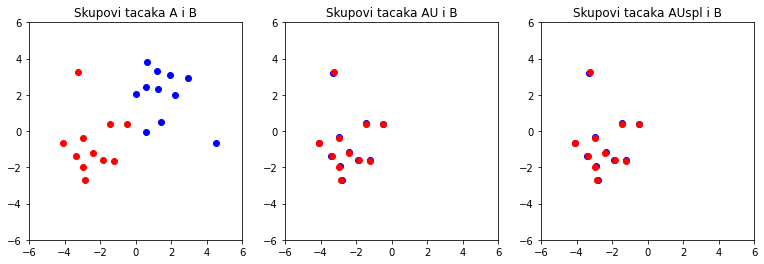

In [28]:
slika, ax = plt.subplots(1, 3,figsize=(13,4)) 

plt.subplot(1, 3, 1)
plt.title("Skupovi tacaka A i B")
plt.plot(A[:,0],A[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 2)
plt.title("Skupovi tacaka AU i B")
plt.plot((A@U)[:,0],(A@U)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 3)
plt.title("Skupovi tacaka AUspl i B")
plt.plot((A@Uspl)[:,0],(A@Uspl)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6]);

Следећу конфигурацију формирамо само пермутацијом редоследа тачака и додавањем Гаусовог шума.

In [31]:
m, n= 11 , 2   #dvodimenzionalna konfiguracija
A=rndm.uniform(-1,5,(m,n))
perm=rndm.permutation(m)
B=A[perm]+0.3*rndm.randn(m,n)
C=A.T@B
X,Sigma,Yt=spl.svd(C)
U=X@Yt
Uspl, _=spl.orthogonal_procrustes(A,B)

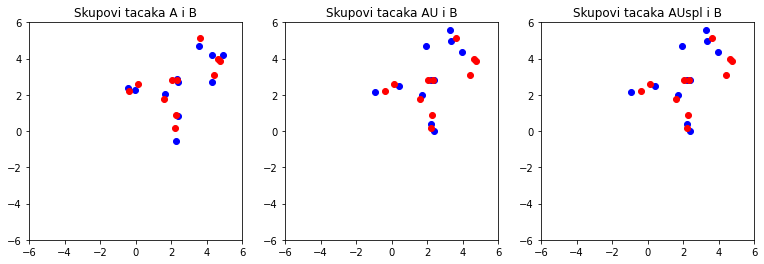

In [32]:
slika, ax = plt.subplots(1, 3,figsize=(13,4)) 

plt.subplot(1, 3, 1)
plt.title("Skupovi tacaka A i B")
plt.plot(A[:,0],A[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 2)
plt.title("Skupovi tacaka AU i B")
plt.plot((A@U)[:,0],(A@U)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 3)
plt.title("Skupovi tacaka AUspl i B")
plt.plot((A@Uspl)[:,0],(A@Uspl)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6]);

У наставку креирамо конфигурације у три димензије.

In [36]:
m, n= 11 , 3    #trodimenzionalna konfiguracija
A3=rndm.uniform(-3,3,(m,n))
Q,_=spl.qr(rndm.rand(n,n))
B3=A3@Q+0.05*rndm.randn(m,n)
C3=A3.T@B3
X3,Sigma3,Y3t=spl.svd(C3)
U3=X3@Y3t
AT=A3@U3
U3spl, _=spl.orthogonal_procrustes(A3,B3)
A3spl=A3@U3spl

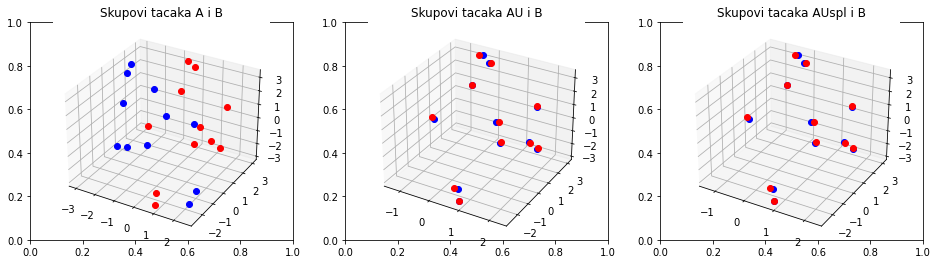

In [37]:
slika, ax = plt.subplots(1, 3,figsize=(16,4)) 

ax = slika.add_subplot(131, projection='3d')
plt.title("Skupovi tacaka A i B")
plt.plot(A3[:,0],A3[:,1],A3[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or')


ax = slika.add_subplot(132, projection='3d')
plt.title("Skupovi tacaka AU i B")
plt.plot(AT[:,0],AT[:,1],AT[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

ax = slika.add_subplot(133, projection='3d')
plt.title("Skupovi tacaka AUspl i B")
plt.plot(A3spl[:,0],A3spl[:,1],A3spl[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

У следећој конфигурацији извршићемо само пермутацију полазног скупа тачака уз додатак Гаусовог шума координатама.

In [41]:
m, n= 11 , 3    #trodimenzionalna konfiguracija
A3=rndm.uniform(-3,3,(m,n))
perm=rndm.permutation(m)
B3=A3[perm]+0.07*rndm.randn(m,n)
C3=A3.T@B3
X3,Sigma3,Y3t=spl.svd(C3)
U3=X3@Y3t
AT=A3@U3
U3spl, _=spl.orthogonal_procrustes(A3,B3)
A3spl=A3@U3spl

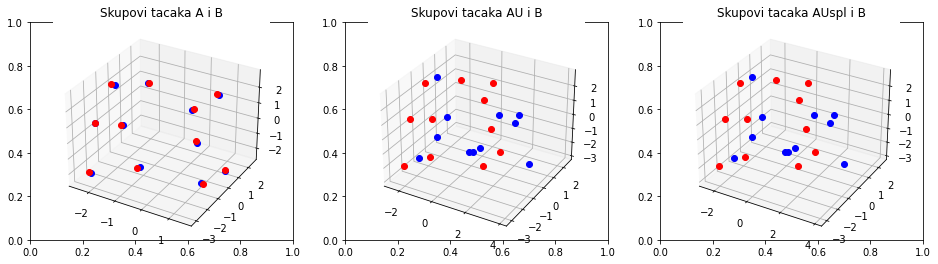

In [42]:
slika, ax = plt.subplots(1, 3,figsize=(16,4)) 

ax = slika.add_subplot(131, projection='3d')
plt.title("Skupovi tacaka A i B")
plt.plot(A3[:,0],A3[:,1],A3[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or')


ax = slika.add_subplot(132, projection='3d')
plt.title("Skupovi tacaka AU i B")
plt.plot(AT[:,0],AT[:,1],AT[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

ax = slika.add_subplot(133, projection='3d')
plt.title("Skupovi tacaka AUspl i B")
plt.plot(A3spl[:,0],A3spl[:,1],A3spl[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

На овом примеру видимо да поступак не ради најбоље када се примењује само пермутација полазног скупа података. Разлог лежи у томе што алгоритам покушава да слика први вектор у први вектор, итд. Центрирањем и скалирањем података и [додатним техникама](https://en.wikipedia.org/wiki/Generalized_Procrustes_analysis) могу да се добију бољи резултати. У појединим ситуацијама може се додати и услов да ортогонална матрица $Q$ чува оријентацију у простору, тј. да је $\det Q>0.$

## Норма трага (Nuclear norm)

За правоугаону матрицу $A\in\mathcal{M}_{m\times n},$ $L_1$ варијаната Фробенијусове норме назива се норма трага
$$\|A\|_N=\sigma_1+\sigma_2+\dots+\sigma_r.$$
Ова норма добија се на основу SVD матрице $A,$ било редуковане, било пуне декомпозиције.
$$
A=U_r\Sigma_{r\times r}V_r^T=\left[\begin{array}{c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}\\
u_1&\dots&u_r\\ \phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{cccc}
\sigma_1&0&\dots&0\\0&\sigma_2&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_r
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_r^T\phantom{WW}
\end{array}\right]
\quad\Longrightarrow\quad
\|A\|_N={\rm tr}(\Sigma_{r\times r}).
$$

Норма трага представља $L_1$ норму вектора сингуларних вредности матрице $A.$ Због тога је то норма најближа по вредности $L_0$ функцији вектора сингуларних вредности. $L_0$ функција овог вектора даје управо вредност ранга $r$ матрице $A.$ Због тога поступци минимизације по норми трага дају као резултат матрице најмањег ранга.

Видети проблеме [matrix completion](https://en.wikipedia.org/wiki/Matrix_completion), [Netflix prize](https://en.wikipedia.org/wiki/Netflix_Prize) и [matrix regularization](https://en.wikipedia.org/wiki/Matrix_regularization).

На основу познатог односа $L_2$ и $L_1$ норми вектора закључујемо да за сваку матрицу $A$ важи $\|A\|_F\leq\|A\|_N.$
Онда једноставно следи да се и ова норма слаже са векторском нормом $L_2.$
$$\|Av\|\leq\|A\|_F\|v||\leq\|A\|_N\|v\|.$$

**Последица 4.** Норма трага је инваријантна у односу на ортогоналне трансформације.

**Доказ :**

Нека је $A=U\Sigma V^T$ пуна SVD ове матрице и $Q\in\mathcal{M}_{m\times m}$ ортогонална матрица. Тада је $W=QU$ поново ортогонална матрица и $QA=W\Sigma V^T$ је пуна SVD матрице $QA,$ те ове матрице деле сингуларне вредности. Закључујемо да је 
$$\|A\|_N=\|QA\|_N.\quad\Box$$

**Пример 7.** Потражимо норму трага матрица $A,B,QB,QA,$ где су матрице $A,B$ и $Q$ генерисане у ранијим примерима.

In [21]:
np.linalg.norm(A,'nuc')

6.946034429259505

In [22]:
np.linalg.norm(Q@A,'nuc')

6.946034429259505

In [23]:
np.linalg.norm(A@Q,'nuc')

6.946034429259505

In [24]:
np.linalg.norm(B,'nuc')

14.923702643401178

In [25]:
np.linalg.norm(Q@B,'nuc')

14.923702643401182

In [26]:
np.sum(sigma)

14.923702643401178

Име норме $\|\cdot\|_N$ последица је једнакости у наставку.

Нека је $A=U_r\Sigma_{r\times r}V_r^T$ редукована SVD матрице $A\in\mathcal{M}_{m\times n}.$ 
\begin{align}
A^TA&=\big(U_r\Sigma_{r\times r}V_r^T\big)^T\big(U_r\Sigma_{r\times r}V_r^T\big)
=V_r\Sigma_{r\times r}U_r^TU_r\Sigma_{r\times r}V_r^T\\
&=V_r\Sigma_{r\times r}^2V_r^T=\big(V_r\Sigma_{r\times r}V_r^T\big)\big(V_r\Sigma_{r\times r}V_r^T\big)\\
&=B^2.\\
\Longrightarrow&\quad \|A\|_N={\rm tr}(B).
\end{align}

И норма трага има особину суб-мултипликативности, тј. важи
$$\|AB\|_N\leq\|A\|_N\|B\|_N.$$

Због тога се за норму матрица обично даје следећа дефиниција.

**Дефиниција 3.** Функција $\|\cdot\|:\mathcal{M}_{m\times n}\mapsto\mathbb{R}_0^+,\ m,n\in\mathbb{N}$ је матрична норма ако  $\forall A\in\mathcal{M}_{m\times n},\ B\in\mathcal{M}_{n\times p}$ и $\forall c\in\mathbb{R}$ задовољава следеће особине:

|   |   |   |
|---|---|---|
| МН1: |$\|A\|\geq0$ i $\|A\|=0\ \Longleftrightarrow\ A=O,$ | (јединствен минимум ненегативне функције)|
| МН2: |$\|cA\|=|c|\,\|A\|,$ |  (хомогеност)|
| МН3: |$\|A+B\|\leq\|A\|+\|B\|,$| (суб-адитивност)|
| МН4: |$\|A\,B\|\leq\|A\|\,\|B\|.$|  (суб-мултипликативност)|

У наставку упознајемо још једну класу веома значајних норми.

## Норма индукована векторском нормом



За Фробенијусову и траг норму показали смо да се слажу са операцијом множења матрице и вектора. Наредна врста норми се управо на томе базира.

**Дефиниција 4.** Матрична норма $\|\cdot\|_p$ индукована векторском нормом $L_p$ дефинисана је са
$$\|A\|_p=\sup_{v\neq\theta}\frac{\|Av\|_p}{\|v\|_p}=\sup_{v\neq\theta}\frac{\left\|A\frac{v}{\|v\|_p}\right\|_p}{\left\|\frac{v}{\|v\|_p}\right\|_p}
	=\max_{\|v\|_p=1}{\|Av\|_p}.
$$

Другим речима, матрична норма $\|A\|_p$ је најмања ненегативна вредност $C$ за коју важи
$$\|Av\|_p\leq C\|v\|_p,\qquad\mbox{ за сваки вектор } v\in \mathbb{R}^n.$$

Матрична норма описује максимално релативно истезање вектора под дејством матрице $A,$ тј. максимално истезање вектора са јединичне сфере под дејством матрице $A\in\mathcal{M}_{m\times n},$ мерено одговарајућом векторском нормом. Геометрија јединичне сфере векторског простора условљена је избором векторске норме $L_p.$

Приметимо да вектори $v\in\mathbb{R}^n$ и $Av\in\mathbb{R}^m$ не припадају истим векторским просторима, али се њихова норма израчунава аналогним изразима.

**Лема 2.** За функцију из дефинције 4. важи да се слаже са операцијом множења матрице и вектора.

**Доказ :**

Нека је $v\in \mathbb{R}^n$ произвољан ненула вектор. Тада је
$$ \|Av\|_p\stackrel{v\neq\theta}{=}\dfrac{\|Av\|_p}{\|v\|_p}\|v\|_p
 \leq\left(\sup_{u\neq\theta}\dfrac{\|Au\|_p}{\|u\|_p}\right)\|v\|_p=\|A\|_p\,\|v\|_p.\tag{3}$$

**Теорема 4.** Функција из дефиниције 4. задовољава аксиоме норме матрица.

**Доказ :**

**МН1 :** $\|A\|_p\geq0$ очигледно важи, јер је израз $\|A\|_p$ дат као максимална вредност ненегативних вредности. Покажимо да је $\|A\|_p=0\ \Longleftrightarrow\ A=O.$
$$\|A\|_p=0\ \Longleftrightarrow\ \sup_{v\neq\theta}\dfrac{\|Av\|_p}{\|v\|_p}=0
 \ \Longleftrightarrow\ \|Av\|_p=0,\forall v\in \mathbb{R}^n\ \Longleftrightarrow\ A=O.
$$

**МН2 :** $\|\alpha A\|_p=|\alpha|\,\|A\|_p,\ \forall A,\ \forall \alpha$
$$\|\alpha A\|_p=\max_{\|v\|_p=1}{\|\alpha Av\|_p}=\max_{\|v\|_p=1}{|\alpha|\|Av\|_p}=
 |\alpha|\max_{\|v\|_p=1}{\|Av\|_p}=|\alpha|\|A\|_p.
$$

**МН3 :** $\|A+B\|_p\leq\|A\|_p+\|B\|_p,\ \forall A,B$
 \begin{align}
  \|A+B\|_p&=\max_{\|v\|_p=1}{\|(A+B)v\|_p}
 =\max_{\|v\|_p=1}{\|Av+Bv\|_p}\leq\max_{\|v\|_p=1}{\big\{\|Av\|_p+\|Bv\|_p\big\}} \\
 &\leq\max_{\|v\|_p=1}{\|Av\|_p}+\max_{\|v\|_p=1}{\|Bv\|_p}=\|A\|_p+\|B\|_p.
 \end{align}

**МН4 :** $\|AB\|_p\leq\|A\|_p\,\|B\|_p$
\begin{align}
 \|AB\|_p&=\max_{\|v\|_p=1}{\|ABv\|_p}=\max_{\|v\|_p=1}{\|A(Bv)\|_p}
 \stackrel{(3)}{\leq}\max_{\|v\|_p=1}{\|A\|_p\,\|(Bv)\|_p}\\
& =\|A\|_p\max_{\|v\|_p=1}{\|(Bv)\|_p}
 =\|A\|_p\,\|B\|_p
 \end{align}

Најзначајније индуковане матричне норме су у тесној вези са најчешће коришћеним векторским $L_p$ нормама. 

**Пример 8.** NumPy наредба `linalg.norm` подржава израчунавање индукованих норми. Потражићемо вредности $L_1,L_2,L_{\infty}$ индукованих норми за раније генерисане матрице.

In [27]:
np.linalg.norm(A,1)

4.734500003510578

In [28]:
np.linalg.norm(A,2)

3.6039277412179476

In [29]:
np.linalg.norm(A,np.infty)

4.775856381826321

In [30]:
np.linalg.norm(B,1)

4.805171628600636

In [31]:
np.linalg.norm(B,2)

6.662888863010314

In [32]:
np.linalg.norm(B,np.infty)

12.957390015221323

In [33]:
np.linalg.norm(Q,1)

2.5727055875062548

In [34]:
np.linalg.norm(Q,2)

1.0000000000000002

In [35]:
np.linalg.norm(Q,np.infty)

2.4406859191753765

**Пример 9.** У свакој индукованој матричној норми је $\|I\|_p=1.$
\begin{align}\|I\|_p&=\sup_{v\neq\theta}\dfrac{\|Iv\|_p}{\|v\|_p}=
	\sup_{v\neq\theta}\dfrac{\|v\|_p}{\|v\|_p}=1.
\end{align}

In [36]:
np.linalg.norm(np.eye(21),1)

1.0

In [37]:
np.linalg.norm(np.eye(21),2)

1.0

In [38]:
np.linalg.norm(np.eye(21),np.infty)

1.0

In [39]:
np.linalg.norm(np.eye(21),'fro')

4.58257569495584

In [40]:
np.linalg.norm(np.eye(21),'nuc')

21.0

Закључујемо да, иако се Фробенијусова норма лакше израчунава, норме индуковане векторском нормом боље описују јединичну матрицу као јединични елемент алгебре матрица. Слично повезује и међусобно инверзне матрице.

**Пример 10.** Нека је $A$ регуларна матрица. За индуковану матричну норму важи да је $$\|A^{-1}\|_p\geq\frac{1}{\|A\|_p}.$$
Нека је $v$ ненула вектор.
$$\|v\|_p=\|A^{-1}Av\|_p\leq\|A^{-1}\|_p\ \|Av\|_p
\leq\|A^{-1}\|_p\ \|A\|_p\ \|v\|_p\qquad \big|:\|v\|_p$$
$$\Longrightarrow\ 1\leq\|A^{-1}\|_p\ \|A\|_p\ \Longrightarrow\
\|A^{-1}\|_p\geq\dfrac{1}{\|A\|_p}.$$

In [41]:
M=rndm.uniform(-1,2,(12,12))
np.linalg.matrix_rank(M)

12

In [42]:
np.linalg.norm(M,1)*np.linalg.norm(np.linalg.inv(M),1)>=1

True

In [43]:
np.linalg.norm(M,2)*np.linalg.norm(np.linalg.inv(M),2)>=1

True

In [44]:
np.linalg.norm(M,np.inf)*np.linalg.norm(np.linalg.inv(M),np.inf)>=1

True

In [45]:
np.linalg.norm(M,'fro')*np.linalg.norm(np.linalg.inv(M),'fro')>=1

True

In [46]:
np.linalg.norm(M,'nuc')*np.linalg.norm(np.linalg.inv(M),'nuc')>=1

True

Размислити због чега аналогна неједнакост важи и за Фробенијусову и траг норму.

За норму инверзне матрице $A^{-1}$ регуларне матрице $A$ можемо да добијемо и бољи резултат.
$$\frac1{\|A^{-1}\|_p}=
	\frac1{\sup_{v\neq\theta}\frac{\|A^{-1}v\|_p}{\|v\|_p}}
	=\inf_{v\neq\theta}\frac{\|v\|_p}{\|A^{-1}v\|_p}
	=\inf_{v\neq\theta}\frac{\|AA^{-1}v\|_p}{\|A^{-1}v\|_p}.$$
Уведимо ознаку $u=A^{-1}v.$ С обзиром да је $A$ регуларна матрица то је $$v\neq\theta\Longleftrightarrow\ A^{-1}v\neq\theta
	\Longleftrightarrow\ u\neq\theta.$$ Претходна једнакост тада постаје
$$
	\frac1{\|A^{-1}\|_p}=\inf_{u\neq\theta}\frac{\|Au\|_p}{\|u\|_p}
	=\min_{\|u\|_p=1}\|Au\|_p.
$$
Другим речима, вредност $\dfrac1{\|A^{-1}\|}$ нам показује у којој мери регуларна матрица $A$ највише контрахује векторе са јединичне сфере.

Упознаћемо начин израчунавања најзначајнијих матричних $L_p$ норми.

|   |
|---|
|$$L_1:\ \|A\|_1=\sup_{v\neq\theta}\dfrac{\|Av\|_1}{\|v\|_1}=\max_{\|v\|_1=1}{\|Av\|_1}$$|

Да бисмо извели  израз за рачунање $L_1$ матричне норме уведимо ознаке колона матрице $A\in\mathcal{M}_{n\times n}$ и ознаке компоненти јединичног вектора $v\in\mathbb{R}^n.$
$$A=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	a_1&a_2&\dots&a_n\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right],\qquad v=\begin{bmatrix} x_1\\x_2\\\vdots\\x_n\end{bmatrix}.$$

Како је $\|v\|_1=1\ \Longleftrightarrow\ \displaystyle\sum_{i=1}^n|x_i|=1,$ то је
$$\|Av\|_1=\left\|\sum_{i=1}^nx_ia_i\right\|_1\stackrel{\mbox{МН3}}{\leq}
	\sum_{i=1}^n\|x_ia_i\|_1\stackrel{\mbox{МН2}}{=}
	\sum_{i=1}^n|x_i|\,\|a_i\|_1\leq\max_i\|a_i\|_1\sum_{i=1}^n|x_i|=\max_i\|a_i\|_1.$$
Због тога за матрицу $A=[a_{ij}]$ важи
$$	\|A\|_1=\max_{\|v\|_1=1}{\|Av\|_1}=\max_i\|a_i\|_1
	=\max_i\sum_{j=1}^n|a_{ji}|.
$$
Закључујемо да	$L_1$ матрична норма представља максималну суму модула компоненти вектора-колона матрице $A.$ 

In [47]:
np.linalg.norm(A,1)

4.734500003510578

In [48]:
np.max(np.linalg.norm(A,1,axis=0))

4.734500003510578

|   |
|---|
|$$L_2:\ \|A\|_2=\sup_{v\neq\theta}\dfrac{\|Av\|_2}{\|v\|_2}=\max_{\|v\|_2=1}{\|Av\|_2}$$|

Нека су $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_r>0$ све сингуларне вредности матрице $A.$
На основу показаних тврђења за сингуларне вредности и векторе матрице закључујемо да је $\|A\|_2=\sigma_1$ максимална сингуларна вредност. 

In [49]:
np.linalg.norm(A,2)

3.6039277412179476

In [50]:
sigmaA=spl.svdvals(A)
np.max(sigmaA)

3.6039277412179476

|   |
|---|
|$$L_{\infty}:\ \|A\|_{\infty}=\sup_{v\neq\theta}\dfrac{\|Av\|_{\infty}}{\|v\|_{\infty}}=\max_{\|v\|_{\infty}=1}{\|Av\|_{\infty}}$$|

Нека је $v\in\mathbb{R}^n$ јединични вектор у односу на $L_{\infty}$ норму, 
$$\|v\|_{\infty}=\max_{1\leq i\leq n}|x_i|=1.$$
Посматрамо поделу матрице $A$ на векторе-врста,
$A=\begin{bmatrix} \underline{\phantom{WW}a_1^T\phantom{WW}}\\
	\underline{\phantom{WW}a_2^T\phantom{WW}}\\\vdots\\\overline{\phantom{WW}a_m^T\phantom{WW}}\end{bmatrix}.$
Тада је
\begin{align}\|Av\|_{\infty}&=\left\|\begin{bmatrix} a_1^Tv\\a_2^Tv\\\vdots\\a_m^Tv\end{bmatrix}\right\|_{\infty}
=\max_{1\leq i\leq m}\big|a_i^Tv\big|=\max_{1\leq i\leq m}\left|\displaystyle\sum_{j=1}^m a_{ij}x_j\right|\leq
	\max_{1\leq i\leq m}\displaystyle\sum_{j=1}^m|a_{ij}x_j|\\
	&=\max_{1\leq i\leq m}\displaystyle\sum_{j=1}^m|a_{ij}|\,|x_j|
    \stackrel{|x_j|\leq1}{\leq}\max_{1\leq i\leq m}\displaystyle\sum_{j=1}^m|a_{ij}|
	.\end{align}
$L_{\infty}$ матрична норма матрице $A$ пердставља максималну суму апсолутних вредности компоненти вектора-врста матрице $A.$

In [51]:
np.linalg.norm(A,np.inf)

4.775856381826321

In [52]:
np.max(np.linalg.norm(A,1,axis=1))

4.775856381826321

**Пример 11.** Нека је $A\in\mathcal{M}_{n\times n}$ регуларна квадратна матрица и $\sigma_1\geq\sigma_2\geq\dots\geq\sigma_n>0$ све сингуларне вредности матрице $A.$ Тада су сингуларне вредности њене инверзне матрице $A^{-1}$ једнаке
$$\frac1{\sigma_n}\geq\dots\geq\frac1{\sigma_2}\geq\frac1{\sigma_1}\,.$$ 
Тада је 
$$\|A\|_2=\sigma_1,\qquad \|A^{-1}\|_2=\frac1{\sigma_n}\,.$$ 

In [53]:
np.linalg.norm(np.linalg.inv(A),2)

20.16804099498883

In [54]:
np.max(1/sigmaA)

20.168040994988818

Имајући у виду да је Еуклидова норма инавријантна у односу на ортогоналне трансформације, закључујемо да то важи и за матричну $L_2$ норму.

In [55]:
np.linalg.norm(A)-np.linalg.norm(Q@B)

-3.5360935902133197

In [56]:
np.linalg.norm(A)-np.linalg.norm(A@Q)

-4.440892098500626e-16

## Кондициони број матрице

Норма матрица игра велику улогу у испитивању стабилности поступка израчунавања неке вредности. У те сврхе користићемо основне појмове теорије грешака.

**Дефиниција 5.** Апроксимација вектора вредности $a=\begin{bmatrix} a_1&a_2&\dots&a_n\end{bmatrix}^T\neq\theta$ је неки вектор $v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T.$ Апсолутна грешка ове апроксимације је међусобно растојање два вектора, тј.
$$\Delta a=\|v-a\|.$$  
Релативну грешку апроксимације представља количник 
$$\delta a=\dfrac{\Delta a}{\|a\|}.$$

Сви изрази из дефиниције 5 могу да користе било коју норму вектора. Уколико се користи нека од стандардних $L_p$ норми, граница релативне грешке $\delta a=\dfrac{\Delta a}{\|a\|}\leq\dfrac12\cdot10^{-p}$ може да се тумачи да компоненте $x_k\approx\|v\|$ имају око $p$ тачних значајних цифара. За мање компоненте $x_k<<\|v\|$ ова граница представља тек границу апсолутне грешке.

У реалним ситуацијама тачан вектор $a$ нам углавном није познат, па самим тим нисмо у могућности да одредимо апсолутно и релативно одступање апроксимације $x.$ Тада баратамо само границама апсолутне и релативне грешке.

**Дефиниција 6.** Број $\Delta$ је граница апсолутне грешке апроксимације $x$ тачног вектора вредности $a,$ уколико је $\Delta a\leq\Delta.$ Слично, $\delta$ је граница релативне грешке када важи $\delta a\leq\delta.$

Претпоставимо да је потребно израчунати производ $Av,$ при чему вектор $v$ није тачно дат. То може бити последица грешака заокруживанја, мерења или претходних нумеричких израчунавања. Уместо са тачним низом вредности $v$ располажемо његовом апроксимацијом $v+\varepsilon.$ Граница апсолутне грешке улазних података дата је са $\Delta v=\|\varepsilon\|.$ Желимо да проценимо утицај ове грешке на исход израчунавања $Av.$ Потражимо границу апсолутне грешке резултата израчунавања
		$$\Delta(Av)=
		\|A(v+\varepsilon)-Av\|=\|A\varepsilon\|\leq\|A\|\ \|\varepsilon\|=\|A\|\Delta v.$$
Видимо да норма матрице представља грубу процену коефицијента пропорционалности између граница две апсолутне грешке - израчунавања $Av$ и улазног податка $v.$ 		

За процену релативне грешке резултата $\delta( Av)=\dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}$ у односу на релативну грешку улаза $\delta v=\dfrac{\|\varepsilon\|}{\|v\|}$ претпоставићемо да је матрица $A$ квадратна и регуларна. У том случају имамо
$$\delta( Av)=\dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}\leq\dfrac{\|A\|\ \|\varepsilon\|}{\|Av\|}=\dfrac{\|A\|\ \|A^{-1}\|\ \|\varepsilon\|}{\|A^{-1}\|\ \|Av\|}.$$	
$$\|A^{-1}\|\ \|Av\|\geq\|A^{-1}Av\|=\|v\|\Longrightarrow\ 
		\dfrac{1}{\|A^{-1}\|\ \|Av\|}\leq\dfrac{1}{\|v\|}.$$
$$\Longrightarrow\ \dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}\leq
		\|A\|\ \|A^{-1}\|\dfrac{\|\varepsilon\|}{\|v\|}
		=\|A\|\ \|A^{-1}\|\ \delta v$$
		

Граница релативне грешке израчунавања $\delta( Av)=\dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}$ пропорционална је граници релативне грешке улазних података $\delta v=\dfrac{\|\varepsilon\|}{\|v\|}.$  Горња граница коефицијента пропорционалности дата је изразом 
$$\kappa(A)=\|A\|\ \|A^{-1}\|\geq1=\kappa(I)$$
и назива се [кондициони број](https://en.wikipedia.org/wiki/Condition_number) матрице $A.$ Овај број даје грубу процену коефицијента увећања релативне грешке у израчунавањима.
		
Уколико се за $\kappa(A)$ користи  $L_2$ норма матрица, и $A\in\mathcal{M}_{n\times n}$ регуларна матрица, тада је
$$\kappa(A)=\|A\|\ \|A^{-1}\|=\dfrac{\sigma_1}{\sigma_n}\,,$$
где су $\sigma_1$ и $\sigma_n$ највећа и најмања сингуларна вредност матрице $A.$

Израчунавање кондиционог броја матрице у NumPy-у обавља наредба `linalg.cond`.

In [57]:
np.linalg.cond(A)   

72.68416242786103

In [58]:
np.linalg.cond(A,1)   

162.59281969152923

In [59]:
np.linalg.cond(A,np.inf)   

158.879020282859

In [60]:
np.linalg.cond(A,'fro')   

83.32769699200934

**Пример 12.** Дат је систем једначина $Ax=b$ где су $A=\begin{bmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{bmatrix},$ 
$b=\begin{bmatrix}6\\20\\26+\epsilon\end{bmatrix}$ и $\epsilon$ је параметар чију ћемо вредност да варирамо. Показаћемо прво да је вектор $x=\begin{bmatrix}1\\2\\3\end{bmatrix}$ решење датог система без обзира на вредност параметра $\epsilon.$

$$Ax=\begin{bmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{bmatrix}
\begin{bmatrix}1\\2\\3\end{bmatrix}=\begin{bmatrix}6\\20\\26+\epsilon\end{bmatrix}=b.$$

Приметимо да је матрица $A$ регуларна за све ненула вредности параметра.
$$\begin{vmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{vmatrix}=
\begin{vmatrix}1&1&1\\0&1&2\\\epsilon&1&2\end{vmatrix}=\begin{vmatrix}1&1&1\\0&1&2\\\epsilon&0&0\end{vmatrix}=
\epsilon\begin{vmatrix}1&1\\1&2\end{vmatrix}=\epsilon.$$

Потражићемо решење датог система за $\epsilon\in\{10^{-5},10^{-8},10^{-11}\}.$

In [61]:
epsl=1e-5
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836733.3488375545

In [62]:
np.linalg.cond(A,1)

4000069.999976148

In [63]:
np.linalg.cond(A,np.infty)

7200041.999987065

In [64]:
x=np.linalg.solve(A,b)
x

array([1., 2., 3.])

In [65]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

8.232699664779534e-11

In [66]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

2.2002815367009783e-11

In [67]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [68]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

In [69]:
epsl=1e-8
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836714520.6787343

In [70]:
np.linalg.cond(A,1)

4000000048.182666

In [71]:
np.linalg.cond(A,np.inf)

7200000002.7288

In [72]:
x=np.linalg.solve(A,b)
x

array([1.00000005, 1.99999989, 3.00000005])

In [73]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

1.28861266278306e-07

In [74]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

3.443962205994765e-08

In [75]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [76]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

In [77]:
epsl=1e-11
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836258407212.924

In [78]:
x=np.linalg.solve(A,b)
x

array([1.00009992, 1.99980016, 3.00009992])

In [79]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

0.000244750628638865

In [80]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

6.541235682892722e-05

In [81]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [82]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

Кроз пример примећујемо повећање кондиционог броја матрице као и повеање грешке у добијеном резултату решења. Са друге стране резидуални вектор не бележи никакав проблем. То је управо последица израчунавања са матрицом великог кондиционог броја. За нумеричка израчунавања пожељно је да матрица има кондициони број близак вредности $1.$ 

In [83]:
A=np.array([[888445.,887112],[887112,885781]])
b=np.array([1,0])
resenje=np.array([885781,-887112.])
np.linalg.cond(A)

3148008222834.903

In [84]:
x=np.linalg.solve(A,b)
x

array([ 885803.84094839, -887134.87526985])

In [85]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [86]:
A@resenje-b

array([0., 0.])

Претпоставимо да је неким поступком добијена апроксимација $x_k$ решења $x=A^{-1}b$ система линеарних једначина $Ax=b.$ Резидуални вектор $r=b-Ax_k$ је једина процена квалитета апроксимације коју имамо, тј. процена грешке $\varepsilon_k=x-x_k.$
Како је $r_k=b-Ax_k=Ax-Ax_k=A\varepsilon_k,$ то је $\varepsilon_k=A^{-1}r_k\quad\Longrightarrow\quad \|\varepsilon_k\|\leq\|A^{-1}\|\,\|r_k\|.$

Релативне грешке, као што смо видели у претходној анализи, повезује релација $\delta x\leq\kappa(A)\delta(b).$ Уколико желимо да поправимо апроксимацију $x_k$ применимо исти поступак решавања на систем једначина $A\varepsilon_k=r_k,$ и креирамо нову апроксимацију $x_{k+1}=x_k+\epsilon_k.$ Уколико је $x_k$ добијено као резултат неког тачног метода, да би се поправила апроксимација решења потребно је повећати радну прецизност рачунара.

Претпоставка је да је релативна грешка $\delta(b)$ тачног метода реда величине машинског епсилон $\epsilon_M.$ Због тога је процена релативне грешке апроксимације $\delta x\leq\kappa(A)\epsilon_M.$ Према томе број тачних значајних цифара $m$ је највећи природан број за који важи $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-m}.$

Једно од правила из праксе, тј. емпиријско правило каже да уколико у израчунавању учествује матрица $A,$ процена је да се у поступку губи отприлике $\log_{10}\kappa(A)$ тачних значајних цифара.

**Пример 13.** У колико значајних цифара можемо имати поверења у поступку решавања система линеарних једначина $Ax=b,$ 
$$A=\begin{bmatrix}1&2\\2&3.999\end{bmatrix}?$$

Одредићемо кондициони број матрице $A.$

In [87]:
A=np.array([[1,2],[2,3.999]],np.dtype('float32'))
kapa=np.linalg.cond(A)
kapa

24993.812

Уколико претпоставимо да се израчунавања обављају у једнострукој прецизности (23-битна мантиса), машинско епсилон је приближно $\varepsilon_M=2^{-23}\approx10^{-6}.$ 

In [88]:
kapa*2**(-23)

0.002979494631290436

Следи да је $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-2}$ па добијени вектор решења има бар две тачне цифре.

In [89]:
resenje=rndm.uniform(-5,5,2).astype('float32')
b=A@resenje
xk=np.linalg.solve(A,b)
xk.dtype

dtype('float32')

In [90]:
xk

array([3.0597515, 1.5660467], dtype=float32)

In [91]:
resenje

array([3.0621045, 1.5648701], dtype=float32)

Провером тачности рада у аритметици мантисе дужине $16$ (half precission) видимо да она не доноси веће губитке тачности.

In [92]:
kapa*2**(-16)

0.3813753128051758

In [93]:
xk=spl.solve(A.astype('float16'),b.astype('float16'))
xk.dtype

dtype('float32')

In [94]:
xk

array([6.1914062, 0.       ], dtype=float32)

**Пример 14.** У колико значајних цифара можемо имати поверења у поступку решавања система линеарних једначина $Ax=b,$ 
$$A=\begin{bmatrix}1&2\\2&3\end{bmatrix}?$$

Одредићемо кондициони број матрице $A.$

In [95]:
A=np.array([[1,2],[2,3]],np.dtype('float32'))
kapa=np.linalg.cond(A)
kapa

17.944271

Уколико претпоставимо да се израчунавања обављају у једнострукој прецизности (23-битна мантиса), машинско епсилон је приближно $\varepsilon_M=2^{-23}\approx10^{-6}.$ 

In [96]:
kapa*2**(-23)

2.139123807864962e-06

Следи да је $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-2}$ па добијени вектор решења има бар шест тачних цифара.

In [97]:
resenje=rndm.uniform(-5,5,2).astype('float32')
b=A@resenje
xk=np.linalg.solve(A,b)
xk.dtype

dtype('float32')

In [98]:
xk

array([ 0.11834669, -2.109891  ], dtype=float32)

In [99]:
resenje

array([ 0.11834615, -2.1098907 ], dtype=float32)

In [100]:
kapa*2**(-16)

0.00027380784740671515

In [101]:
xk=spl.solve(A.astype('float16'),b.astype('float16'))
xk.dtype

dtype('float32')

In [102]:
xk

array([ 0.1171875, -2.109375 ], dtype=float32)